
#  Investigate IDMb Movies Dataset By Ahmed Awaad 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is IDMb Movies Data set containing 10866 rows and 21 columns every row represent a movie and the columns represent the movies information like (imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj)

### There are lots of questions to answer from this data
> TimeLine Questions
- 1- Are the movies increase with time or decrease?
- 2- are the profits increase with time or decrease?
- 3- Are the rateing increase with time or decrease?
- 4- Which genre is produced more with time?

> Other question
- 5- what factors affecting movies' high rating?
- 6- what is largest genre produced from 1960 to 2015?
- 7- What is the genre gain more profit?
- 8- which genre is preferred(Gain high vote)?
- 9- which director movies is preferred(Gain high vote)?
- 10- Who is the director movies gain more profit?
- 11- which runtime movies is preferred(Gain high vote)?
- 12- which runtime movies gain more profit?

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I start with loading data assessing it then cleaning  triming it to be ready for analysis.

### Data Gathering

In [2]:
# Loading data from flat file
df = pd.read_csv('tmdb-movies.csv')

### Data Assessing

In [3]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.keywords

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.duplicated().sum()

1

In [8]:
df.cast

0        Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1        Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2        Shailene Woodley|Theo James|Kate Winslet|Ansel...
3        Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4        Vin Diesel|Paul Walker|Jason Statham|Michelle ...
                               ...                        
10861    Michael Hynson|Robert August|Lord 'Tally Ho' B...
10862    James Garner|Eva Marie Saint|Yves Montand|Tosh...
10863    Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...
10864    Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...
10865    Harold P. Warren|Tom Neyman|John Reynolds|Dian...
Name: cast, Length: 10866, dtype: object

In [9]:
df.tagline

0                                        The park is open.
1                                       What a Lovely Day.
2                               One Choice Can Destroy You
3                            Every generation has a story.
4                                      Vengeance Hits Home
                               ...                        
10861                                                  NaN
10862    Cinerama sweeps YOU into a drama of speed and ...
10863                                                  NaN
10864                            WOODY ALLEN STRIKES BACK!
10865         It's Shocking! It's Beyond Your Imagination!
Name: tagline, Length: 10866, dtype: object

In [10]:
df.overview

0        Twenty-two years after the events of Jurassic ...
1        An apocalyptic story set in the furthest reach...
2        Beatrice Prior must confront her inner demons ...
3        Thirty years after defeating the Galactic Empi...
4        Deckard Shaw seeks revenge against Dominic Tor...
                               ...                        
10861    The Endless Summer, by Bruce Brown, is one of ...
10862    Grand Prix driver Pete Aron is fired by his te...
10863    An insurance agent who moonlights as a carthie...
10864    In comic Woody Allen's film debut, he took the...
10865    A family gets lost on the road and stumbles up...
Name: overview, Length: 10866, dtype: object

In [11]:
pd.to_datetime(df.release_date).dt.year.value_counts().sort_index()

1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
2060     32
2061     31
2062     32
2063     34
2064     42
2065     35
2066     46
2067     40
2068     39
2069     31
2070     41
Name: release_date, dtype: int64

In [12]:
df.budget_adj.value_counts()

0.000000e+00    5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
                ... 
4.658819e+06       1
6.641668e+07       1
2.289547e+07       1
2.206182e+06       1
2.264205e+06       1
Name: budget_adj, Length: 2614, dtype: int64

In [13]:
df.budget.value_counts()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
51500000       1
25500000       1
1350000        1
7920000        1
4653000        1
Name: budget, Length: 557, dtype: int64

In [14]:
df.revenue_adj.value_counts()

0.000000e+00    6016
1.438914e+07       2
5.766759e+07       2
1.000000e+06       2
2.093547e+08       2
                ... 
7.036068e+07       1
2.714497e+07       1
7.694895e+07       1
1.087002e+06       1
1.062776e+09       1
Name: revenue_adj, Length: 4840, dtype: int64

In [15]:
df.revenue.value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
             ... 
53676580        1
617000          1
13001257        1
504050219       1
20518905        1
Name: revenue, Length: 4702, dtype: int64

In [16]:
df.vote_count.value_counts().sort_index()

10      501
11      474
12      422
13      377
14      323
       ... 
7375      1
8432      1
8458      1
8903      1
9767      1
Name: vote_count, Length: 1289, dtype: int64

In [17]:
df.runtime.value_counts().sort_index() 

0      31
2       5
3      11
4      17
5      17
       ..
561     1
566     1
705     1
877     1
900     1
Name: runtime, Length: 247, dtype: int64

In [18]:
df.original_title.duplicated().sum()

295

In [19]:
df.imdb_id.duplicated().sum()

10

In [20]:
df.homepage.duplicated().sum()

7969

In [21]:
df[df.original_title.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.9,2014,0.000000e+00,0.000000e+00
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.8,2014,0.000000e+00,0.000000e+00
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,...,When his helicopter goes down during his fourt...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/09,381,6.7,2009,2.642641e+07,4.402879e+07
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,...,"With aerial footage from 54 countries, Home is...",95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/09,109,7.8,2009,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,NaN,Colin Eggleston,Their crime was against nature. Nature found t...,...,When a suburban couple go camping for the week...,92,Horror|Thriller|Mystery,The Australian Film Commission|Victorian Film|...,10/14/78,17,6.1,1978,0.000000e+00,0.000000e+00
10827,2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NaN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,...,The Dynamic Duo faces four super-villains who ...,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,7/30/66,99,5.9,1966,9.256081e+06,0.000000e+00
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00


In [22]:
df[df.original_title== 'Survivor']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.9,2014,0.000000e+00,0.0


In [23]:
df[df.imdb_id.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000e+00,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000e+00,0.0


#### Quality
- release_date column type is a string not a datetime
- release_date year just two numbers not three.
- removing duplicated rows
- zeros values in runtime, revenue_adj and  and budget_adj must changed to be null values 

#### Tidiness
- release_year can be removed because it is inclouded in release_date
- Removing unwanted columns (id, imdb_id, budget, revenue, homepage,  tagline, overview, release_year) 


## Coping data to start cleaning

In [24]:
# Coping data frame to start cleaning
df_cleaned = df.copy()

## Data Cleaning

#### Quality
- release_date column type is a string not a datetime
- release_date year just two numbers not three.

#### Define
> split date with '/' then add 2000 to years from 00 to 15 and 1900 for others then join it and converting it to datetime

##### Code

In [25]:
date=df_cleaned.release_date.str.split('/')
for x in range(len(date.index)):
    if date[x][2] <= '15':
        date[x][2] ='20'+date[x][2]
    else:
        date[x][2] ='19'+date[x][2]
    date[x]="/".join(date[x])

In [26]:
df_cleaned.release_date = pd.to_datetime(date)

####  Test

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

#### Quality
- removing duplicated rows

#### Define
> drop duplicated rows

#### code

In [28]:
df_cleaned.drop_duplicates(inplace=True)

#### Test

In [29]:
df_cleaned.duplicated().sum()

0

#### Tidiness
- release_year must be removed because it is inclouded in release_date

#### Define
> drop release_year column

#### code

In [30]:
df_cleaned.drop(columns='release_year',inplace=True)

#### Test

In [31]:
df_cleaned.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'],
      dtype='object')

#### Tidiness
- Removing unwanted columns (id, imdb_id, budget, revenue, homepage,  tagline, overview, release_year) 

#### Define
> drop unwanted columns (id, budget, revenue, homepage, tagline, overview, release_year)

In [32]:
df_cleaned.drop(columns=['id', 'budget', 'revenue', 'homepage', 'tagline', 'overview'],inplace=True)

#### Test

In [33]:
df_cleaned.columns

Index(['imdb_id', 'popularity', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [34]:
df_cleaned.budget_adj= df.budget_adj.astype(int)

In [35]:
df_cleaned.revenue_adj= df.revenue_adj.astype(int)

#### Quality
- zeros values in runtime, revenue_adj and  and budget_adj must changed to be null values

In [36]:
df_cleaned.runtime.replace(to_replace=[0] , value=np.nan, inplace=True)
df_cleaned.revenue_adj.replace(to_replace=[0] , value=np.nan, inplace=True)
df_cleaned.budget_adj.replace(to_replace=[0] , value=np.nan, inplace=True)

#### Test

In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
imdb_id                 10855 non-null object
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
budget_adj              5167 non-null float64
revenue_adj             4849 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Are the movies increase with time or decrease?)

#### Drowing time line for number of movies with years


In [38]:
#counting the number of movies in aech year
pd.DataFrame(df_cleaned.release_date.dt.year.value_counts().sort_index())

,release_date
1960,32
1961,31
1962,32
1963,34
1964,42
1965,35
1966,46
1967,40
1968,39
1969,31


Text(0.5, 1.0, 'Number of Movies with years')

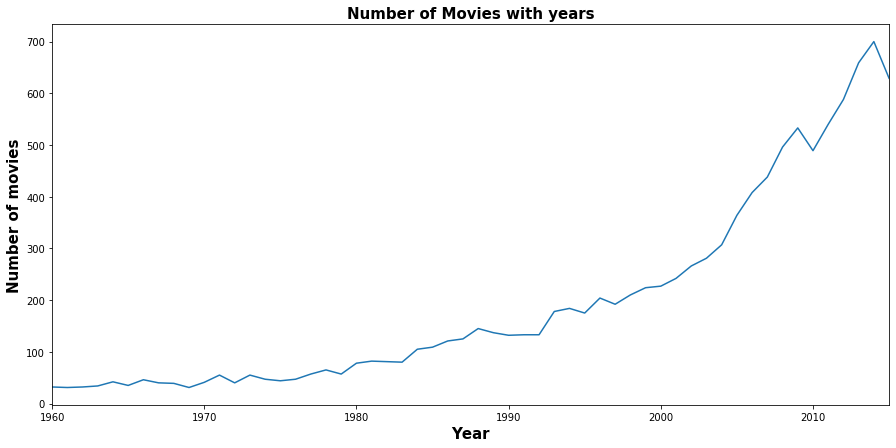

In [39]:
df_cleaned.release_date.dt.year.value_counts().sort_index().plot(figsize=(15,7));
plt.xlabel('Year',fontdict={'weight' : 'bold','size'   : 15})
plt.ylabel('Number of movies',fontdict={'weight' : 'bold','size'   : 15});
plt.title('Number of Movies with years',fontdict={'weight' : 'bold','size'   : 15})

#### Conclusions
The number of movies increases with time from 32 movies in 1960 to 700 in 2014

### Research Question 2 (Are the profits increase with time or decrease?)

In [40]:
# Lets first extract Profit
df_cleaned['profit'] = df_cleaned.revenue_adj-df_cleaned.budget_adj

In [41]:
summation_profit_every_year=df_cleaned.groupby(df_cleaned.release_date.dt.year).sum().profit.sort_index()
pd.DataFrame(summation_profit_every_year)

,profit
release_date,
1960,7.977407e+08
1961,2.181770e+09
1962,1.202945e+09
1963,8.217533e+08
1964,2.071668e+09
1965,2.763256e+09
1966,3.524854e+08
1967,4.159569e+09
1968,1.054890e+09


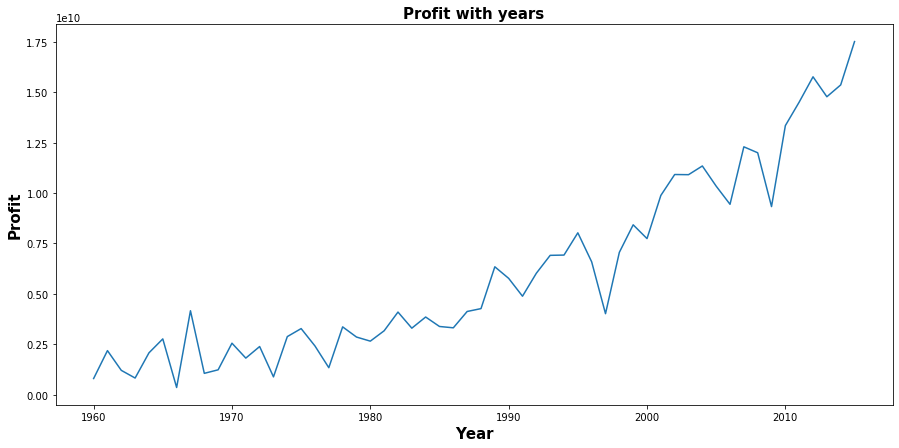

In [42]:
plt.figure(figsize=(15,7))
plt.plot(summation_profit_every_year)
plt.xlabel('Year',fontdict={'weight' : 'bold','size'   : 15})
plt.ylabel('Profit',fontdict={'weight' : 'bold','size'   : 15});
plt.title('Profit with years',fontdict={'weight' : 'bold','size'   : 15});

#### Conclusions
The Profits increases with time from 7.977407e+08 dollar in 1960 to 1.750957e+10 dollar in 2015

### Research Question 3 (Are the rateing increase with time or decrease?)

In [43]:
# calculate the mean vote every year
mean_vote_every_year=df_cleaned.groupby(df_cleaned.release_date.dt.year).mean().vote_average.sort_index()
pd.DataFrame(mean_vote_every_year)

,vote_average
release_date,
1960,6.325000
1961,6.374194
1962,6.343750
1963,6.329412
1964,6.211905
1965,6.194286
1966,6.128261
1967,6.242500
1968,6.379487


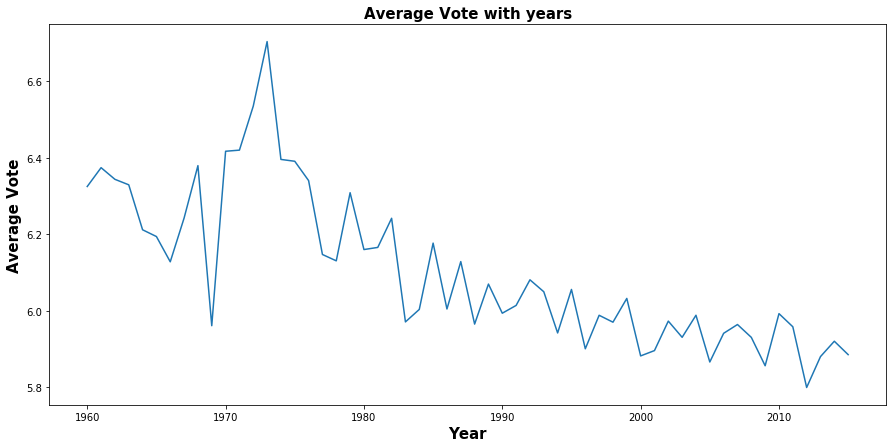

In [44]:
plt.figure(figsize=(15,7))
plt.plot(mean_vote_every_year)
plt.xlabel('Year',fontdict={'weight' : 'bold','size'   : 15})
plt.ylabel('Average Vote',fontdict={'weight' : 'bold','size'   : 15});
plt.title('Average Vote with years',fontdict={'weight' : 'bold','size'   : 15});

#### Conclusions
The Average Vote decrease with time from 6.325 in 1960 to 5.885692 in 2015

### Research Question 4 (Which genre is popular with time?) 

In [45]:
#extract genres
genre_df=df_cleaned.assign(genre=df_cleaned.genres.str.split('|')).explode('genre')
genre_df.head()

,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,profit,genre
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939.0,1.392446e+09,1.254446e+09,Action
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939.0,1.392446e+09,1.254446e+09,Adventure
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939.0,1.392446e+09,1.254446e+09,Science Fiction
0,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939.0,1.392446e+09,1.254446e+09,Thriller
1,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,137999939.0,3.481613e+08,2.101614e+08,Action


In [46]:
#grouping genres with years
genre_counts_with_year =pd.DataFrame(genre_df.groupby([genre_df.release_date.dt.year,'genre']).count().original_title)
genre_counts_with_year.unstack().droplevel(0,axis=1)

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_date,,,,,,,,,,,,,,,,,,,,
1960,8.0,5.0,NaN,8.0,2.0,NaN,13.0,3.0,2.0,1.0,5.0,7.0,1.0,NaN,6.0,3.0,NaN,6.0,2.0,6.0
1961,7.0,6.0,1.0,10.0,2.0,NaN,16.0,5.0,2.0,1.0,3.0,3.0,2.0,1.0,7.0,4.0,NaN,NaN,2.0,3.0
1962,8.0,7.0,NaN,5.0,3.0,NaN,21.0,2.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,2.0,NaN,7.0,3.0,3.0
1963,4.0,7.0,1.0,13.0,4.0,NaN,13.0,3.0,2.0,2.0,4.0,9.0,NaN,6.0,8.0,2.0,NaN,10.0,1.0,2.0
1964,5.0,5.0,2.0,16.0,10.0,NaN,20.0,4.0,4.0,1.0,3.0,6.0,5.0,4.0,9.0,4.0,NaN,9.0,3.0,1.0
1965,9.0,6.0,1.0,7.0,2.0,NaN,20.0,3.0,NaN,1.0,4.0,5.0,2.0,3.0,5.0,2.0,1.0,11.0,8.0,4.0
1966,14.0,11.0,3.0,16.0,5.0,1.0,16.0,7.0,2.0,2.0,2.0,3.0,NaN,6.0,6.0,6.0,NaN,8.0,4.0,7.0
1967,7.0,7.0,2.0,17.0,7.0,1.0,16.0,3.0,3.0,NaN,NaN,4.0,5.0,3.0,11.0,4.0,NaN,5.0,1.0,2.0
1968,6.0,5.0,3.0,9.0,5.0,NaN,20.0,5.0,5.0,NaN,3.0,4.0,3.0,4.0,6.0,4.0,NaN,5.0,4.0,1.0


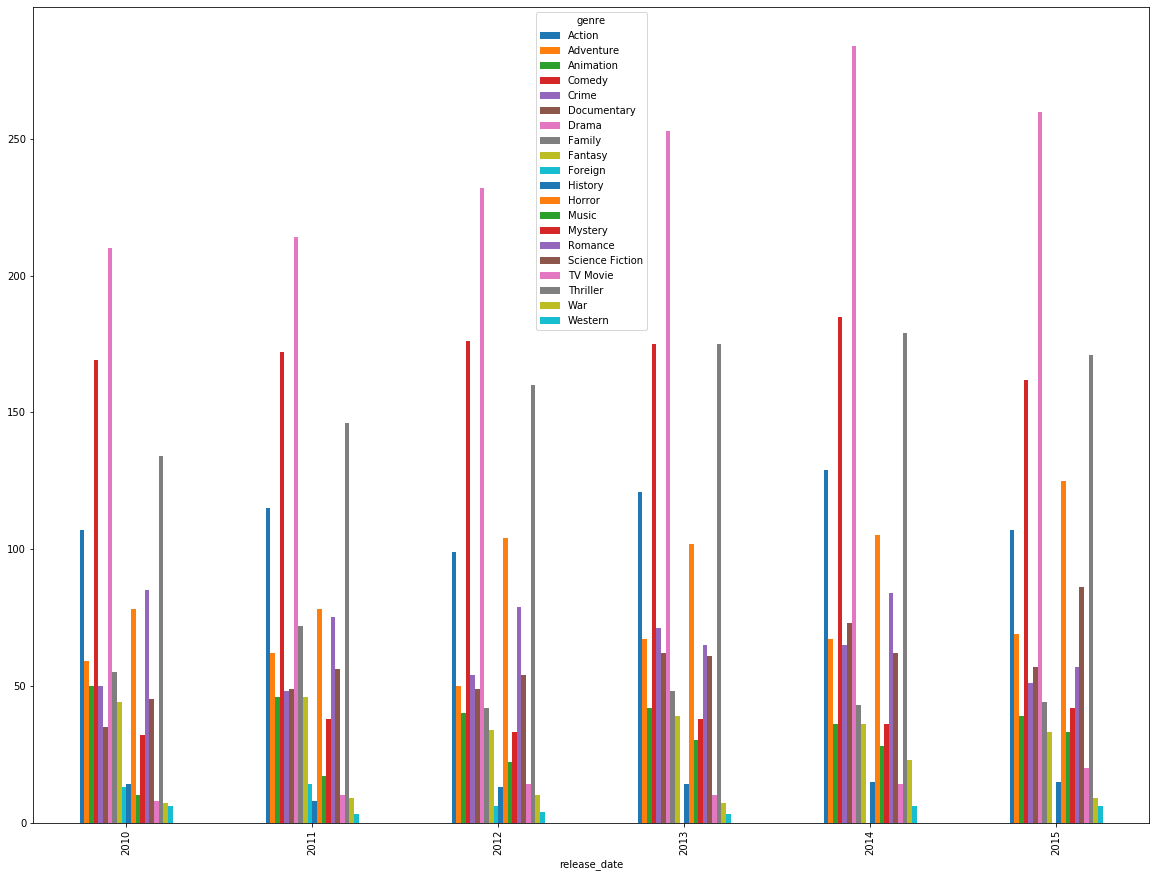

In [47]:
genre_counts_with_year[932:].unstack().droplevel(0,axis=1).plot(kind='bar',figsize=(20,15),linewidth=20);

#### Conclusions
- From 2010 to 2015 

> Drama, Family, Adventure and Science fiction gain more production with time

> Animation, Forgien, western, and music gain less production with time

### Research Question 5  (what factors affecting movies' high rating?)

<Figure size 1440x1440 with 0 Axes>

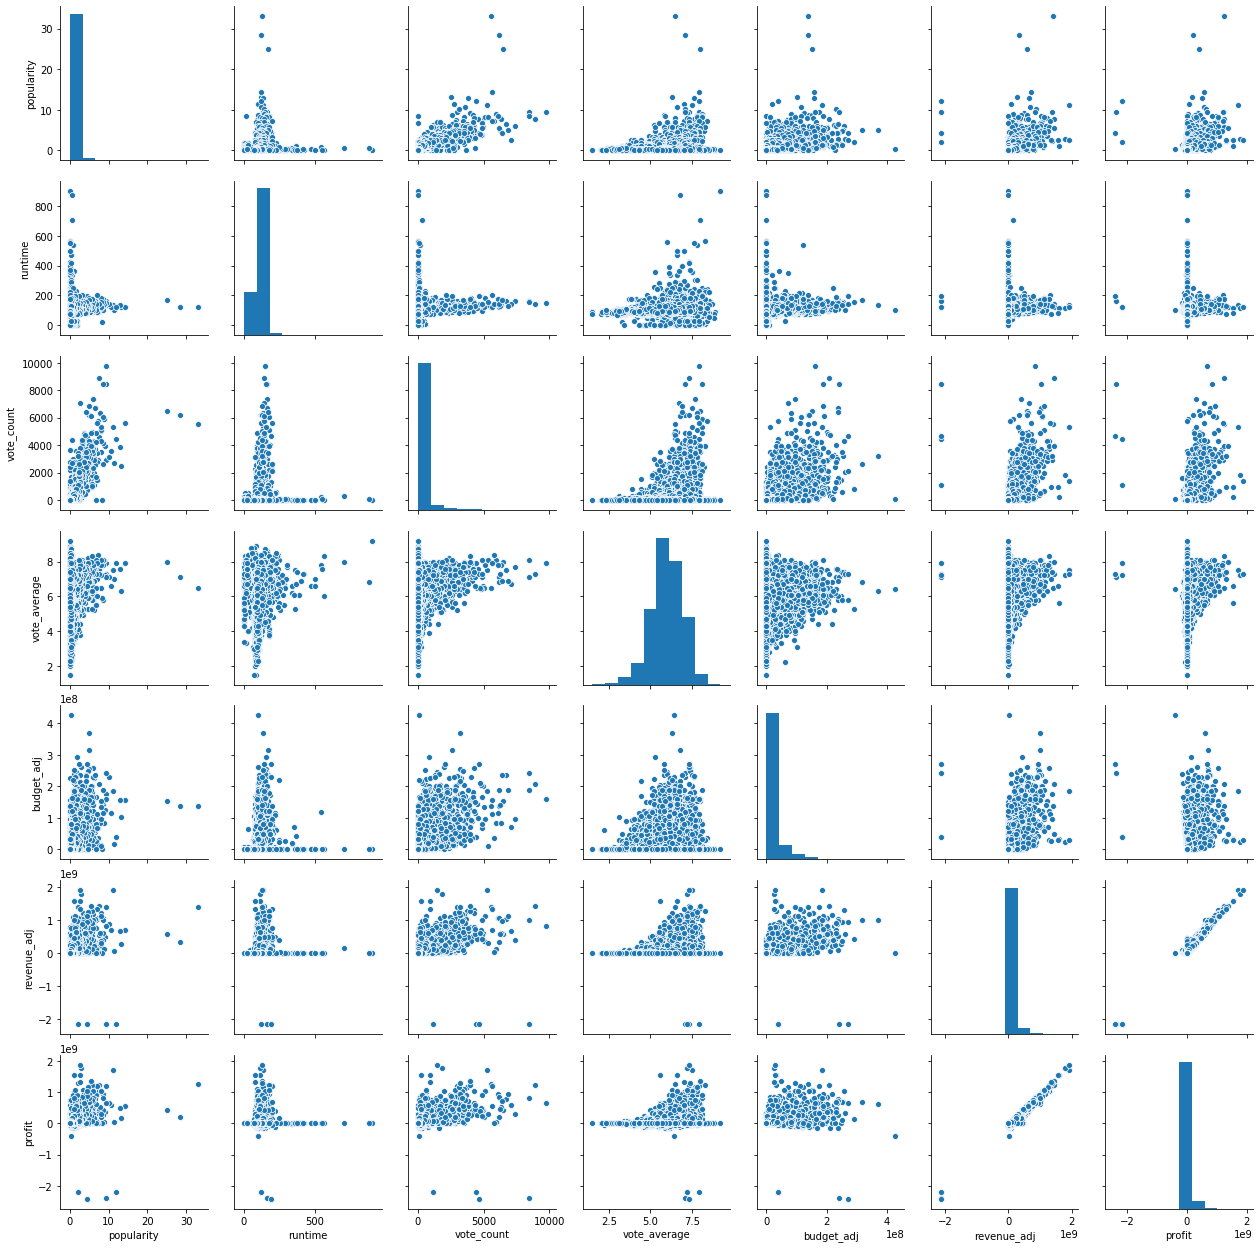

In [48]:
# lets check the relation between variables
fig = plt.figure(figsize=(20,20))
sns.pairplot(df_cleaned.replace(np.nan, 0));

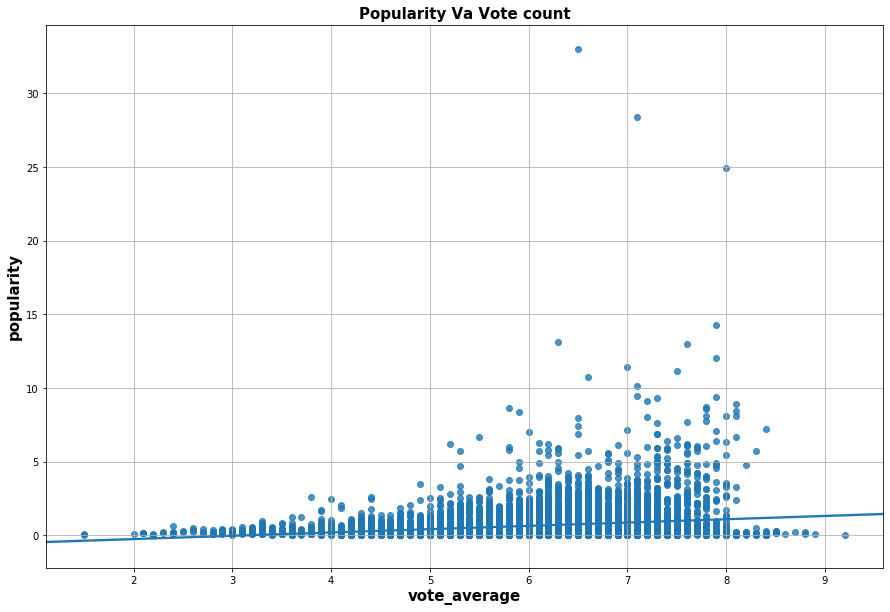

In [49]:
fig = plt.figure(figsize=(15,10))
sns.regplot(x=df.vote_average,y=df.popularity)
plt.xlabel('vote_average',fontdict={'weight' : 'bold','size'   : 15})
plt.ylabel('popularity',fontdict={'weight' : 'bold','size'   : 15});
plt.title('Popularity Va Vote count',fontdict={'weight' : 'bold','size'   : 15});
plt.grid()


#### Conclusions
> from previous charts we found that when the popularity increase the vote average increase 

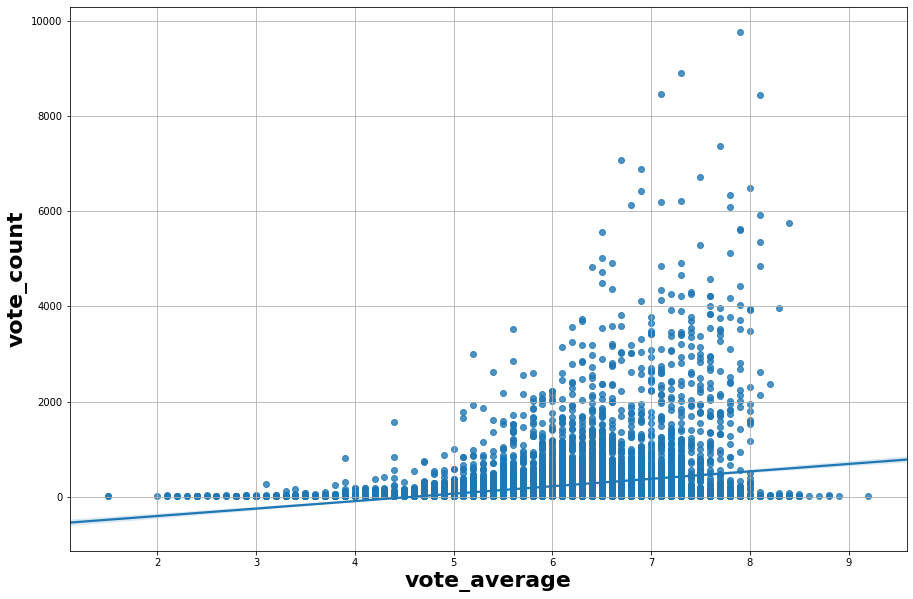

In [50]:
fig = plt.figure(figsize=(15,10))
sns.regplot(x=df.vote_average,y=df.vote_count)
plt.xlabel('vote_average',fontdict={'weight' : 'bold','size'   : 22})
plt.ylabel('vote_count',fontdict={'weight' : 'bold','size'   : 22});
plt.grid()

#### Conclusions
> The vote count increase the vote average increase

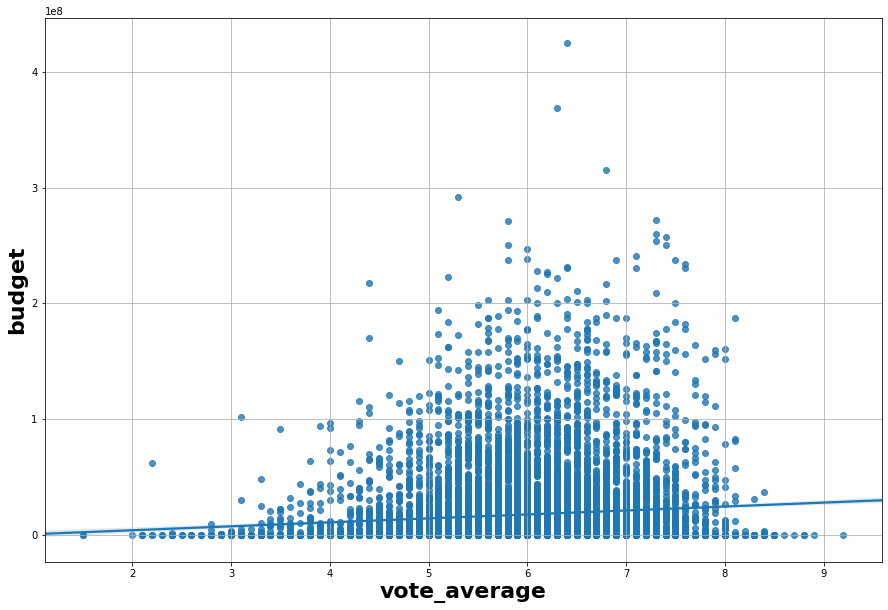

In [51]:
fig = plt.figure(figsize=(15,10))
sns.regplot(x=df.vote_average,y=df.budget_adj)
plt.xlabel('vote_average',fontdict={'weight' : 'bold','size'   : 22})
plt.ylabel('budget',fontdict={'weight' : 'bold','size'   : 22});
plt.grid()

#### Conclusions
> the budget increase the vote average increase

> so from all previous charts 
- the vote increase with popularity and vote count and movie budget

### Research Question 6 (what is largest genre produced from 1960 to 2015?)

In [52]:
#grouping genres to get count in all given years
genre_df.groupby('genre').count().genres.sort_values()

genre
Western             165
TV Movie            167
Foreign             188
War                 270
History             334
Music               408
Documentary         520
Animation           699
Mystery             810
Fantasy             916
Science Fiction    1229
Family             1231
Crime              1354
Adventure          1471
Horror             1637
Romance            1712
Action             2384
Thriller           2907
Comedy             3793
Drama              4760
Name: genres, dtype: int64

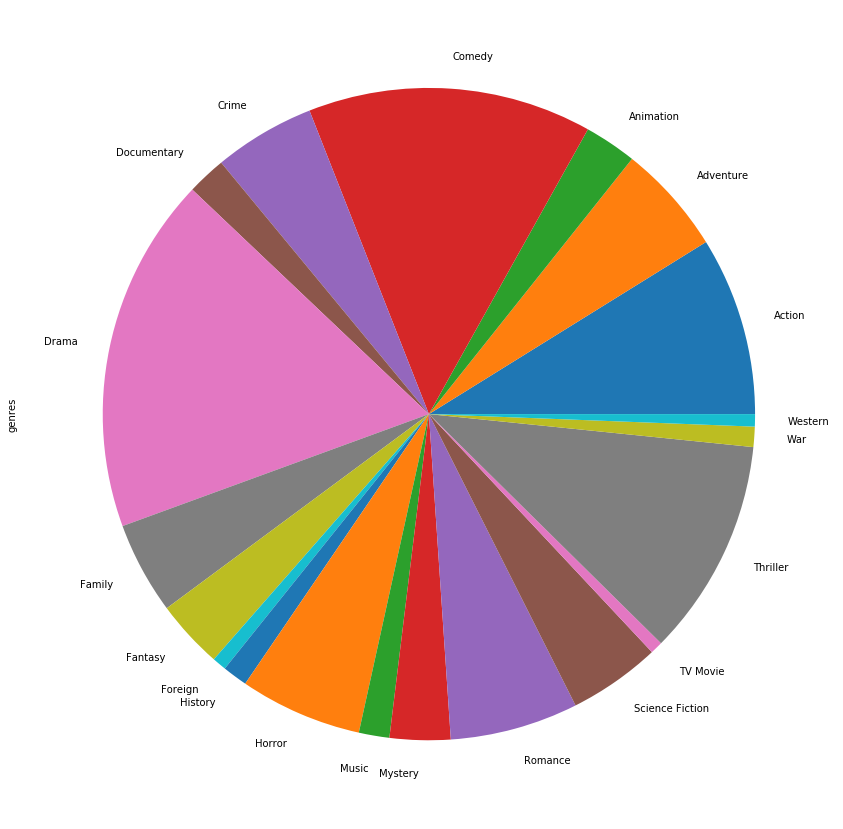

In [53]:
#ploting count
genre_df.groupby('genre').count().genres.plot(kind='pie',figsize=(15,15));

#### Conclusions
> the largest produced genre is Drama with 4760 Movie

> The least produced genre is Western with 165 Movie

### Research Question 7 (What is the genre gain more profit?)

In [54]:
#getting the genres with profit
genre_df.groupby(['genre']).sum().profit.sort_values()

genre
Foreign           -2.138032e+06
TV Movie           5.143802e+07
Documentary        6.799262e+08
Western            3.561153e+09
History            8.356862e+09
War                1.173639e+10
Music              1.351405e+10
Horror             2.261598e+10
Mystery            2.451288e+10
Animation          4.170453e+10
Crime              4.588578e+10
Romance            4.844967e+10
Science Fiction    6.095034e+10
Fantasy            6.224847e+10
Family             7.339327e+10
Thriller           9.164853e+10
Drama              1.080968e+11
Comedy             1.115353e+11
Action             1.299939e+11
Adventure          1.325119e+11
Name: profit, dtype: float64

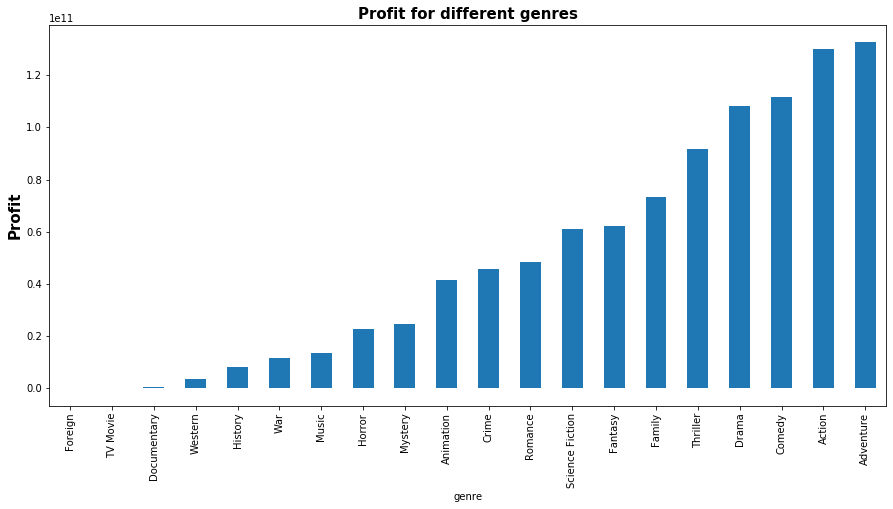

In [55]:
#ploting genres with profit using bar daigram
genre_df.groupby(['genre']).sum().profit.sort_values().plot(kind='bar',figsize=(15,7));
plt.ylabel('Profit',fontdict={'weight' : 'bold','size'   : 15});
plt.title('Profit for different genres',fontdict={'weight' : 'bold','size'   : 15});

#### Conclusions
> Advanture, Action and comdy gain the max profit 

### Research Question 9 (which genre is preferred(Gain high vote)?)

In [56]:
genre_df.groupby('genre').mean().vote_average.sort_values()

genre
Horror             5.337447
Science Fiction    5.665582
Thriller           5.750671
Action             5.787752
TV Movie           5.788024
Fantasy            5.863537
Comedy             5.905167
Adventure          5.940585
Mystery            5.946790
Foreign            5.981383
Family             5.997563
Romance            6.042874
Western            6.083030
Crime              6.124889
Drama              6.165546
War                6.297778
Animation          6.403147
History            6.410479
Music              6.480392
Documentary        6.908462
Name: vote_average, dtype: float64

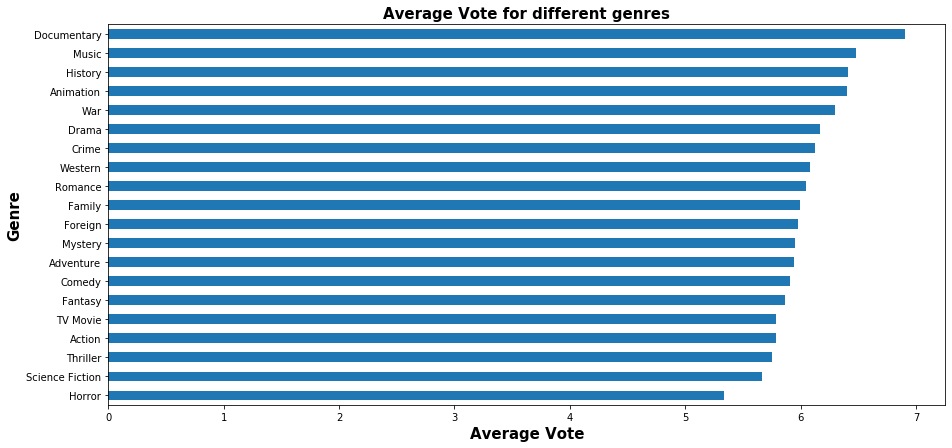

In [57]:
#ploting genres with profit using bar daigram
genre_df.groupby('genre').mean().vote_average.sort_values().plot(kind='barh',figsize=(15,7));
plt.xlabel('Average Vote',fontdict={'weight' : 'bold','size'   : 15})
plt.ylabel('Genre',fontdict={'weight' : 'bold','size'   : 15});
plt.title('Average Vote for different genres',fontdict={'weight' : 'bold','size'   : 15});

#### conclusions
> the preferred genre is  
> Documentary  with averge vote  6.9

### Research Question 9 (which director movies is preferred(Gain high vote)?)

In [58]:
#getting the mean voting for every director
df_cleaned.groupby('director').mean().vote_average.sort_values(ascending=False).head(20)

director
Mark Cousins                                   9.20
Derek Frankowski                               8.80
David Mallet                                   8.70
Curt Morgan                                    8.50
Saul Swimmer                                   8.50
Martin Scorsese|Michael Henry Wilson           8.50
James Payne                                    8.50
Anthony Mandler                                8.40
Jorge RamÃ­rez SuÃ¡rez                         8.40
D.A. Pennebaker|David Dawkins|Chris Hegedus    8.40
Sam Dunn|Scot McFadyen                         8.35
Jennifer Siebel Newsom                         8.35
Claude Lanzmann                                8.30
Jeff Feuerzeig                                 8.30
Andy Saunders                                  8.30
Dean Wellins                                   8.30
Evgeny Afineevsky                              8.20
Ã‡aÄŸan Irmak                                  8.20
Al Reinert                                     8.20
Dam

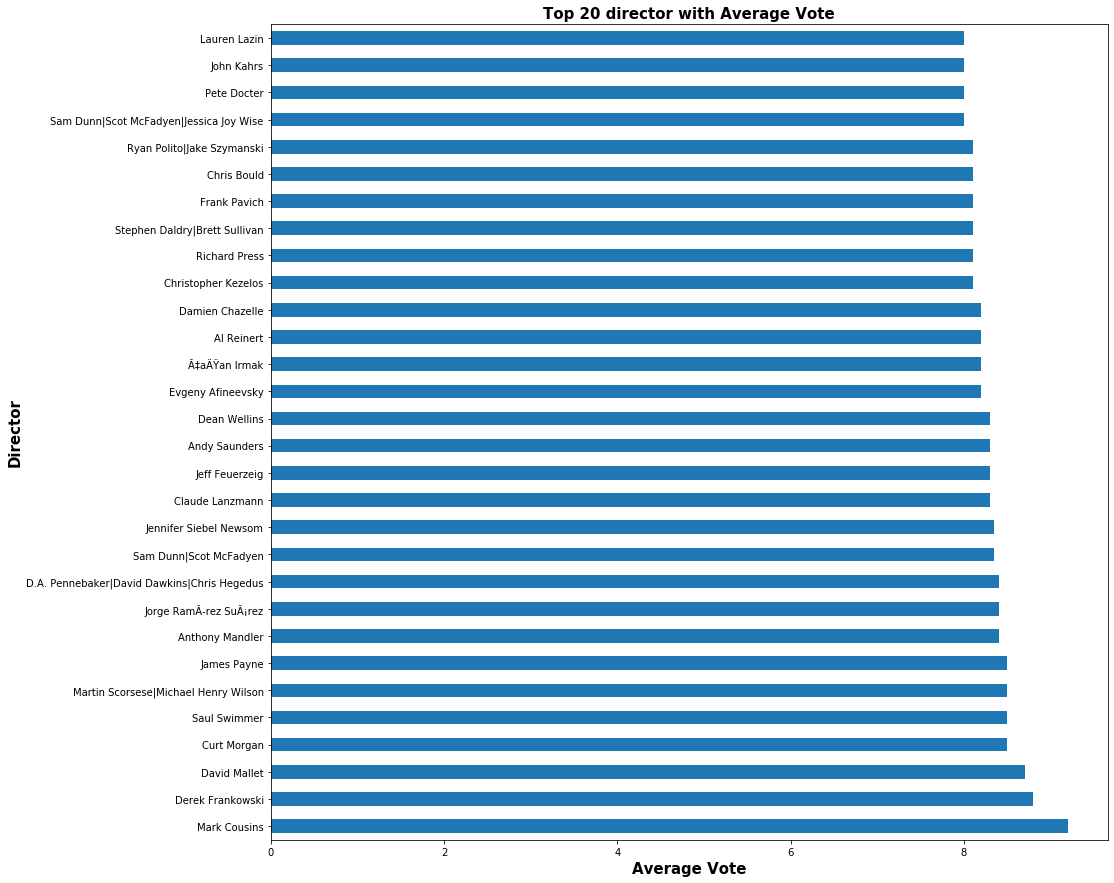

In [59]:
df_cleaned.groupby('director').mean().vote_average.sort_values(ascending=False).head(30).plot.barh(figsize=(15,15));
plt.xlabel('Average Vote',fontdict={'weight' : 'bold','size'   : 15})
plt.ylabel('Director',fontdict={'weight' : 'bold','size'   : 15});
plt.title('Top 20 director with Average Vote',fontdict={'weight' : 'bold','size'   : 15});

#### conclusion
> the top voted movies reated to 
- Mark Cousins         |                           9.20
- Derek Frankowski     |                           8.80
- David Mallet         |                           8.70
- Curt Morgan          |                           8.50
- Saul Swimmer         |                           8.50        

### Research Question 10 (Who is the director movies gain more profit?)

In [60]:
#getting the summation profit for every director
df_cleaned.groupby('director').sum().profit.sort_values(ascending=False).head(20)

director
Steven Spielberg     1.312603e+10
Peter Jackson        5.645492e+09
Robert Zemeckis      4.335995e+09
Chris Columbus       4.171046e+09
Michael Bay          3.958676e+09
David Yates          3.394430e+09
Tim Burton           3.200595e+09
Christopher Nolan    3.149568e+09
Roland Emmerich      2.971858e+09
Ron Howard           2.720393e+09
J.J. Abrams          2.689650e+09
Gore Verbinski       2.656453e+09
Sam Raimi            2.614455e+09
Guy Hamilton         2.607512e+09
Clint Eastwood       2.494672e+09
Ridley Scott         2.404928e+09
Francis Lawrence     2.377729e+09
Richard Donner       2.272672e+09
Joss Whedon          2.268932e+09
Carlos Saldanha      2.186544e+09
Name: profit, dtype: float64

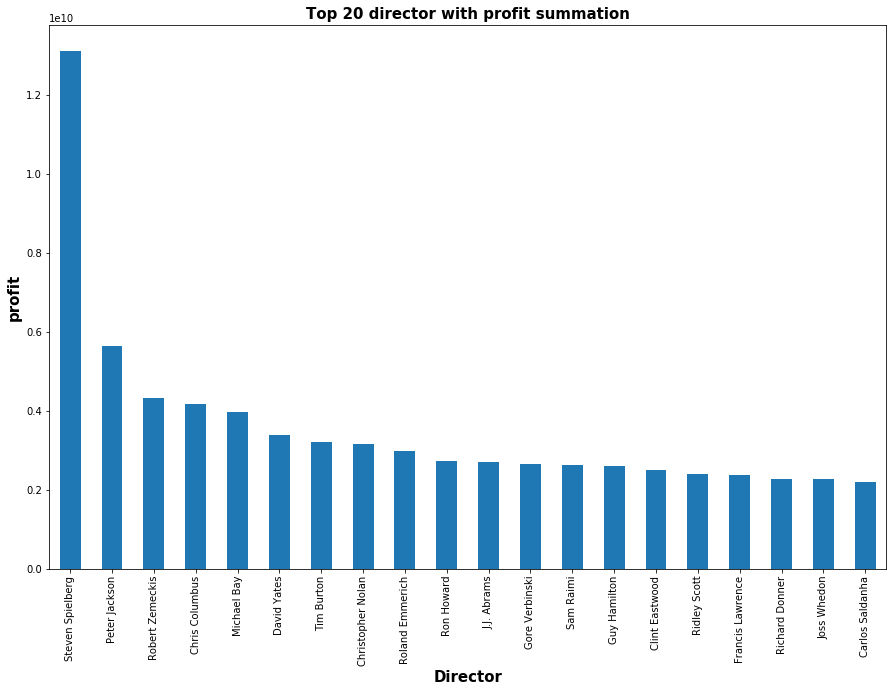

In [61]:
#getting the summation profit for every director
df_cleaned.groupby('director').sum().profit.sort_values(ascending=False).head(20).plot.bar(figsize=(15,10));
plt.xlabel('Director',fontdict={'weight' : 'bold','size'   : 15})
plt.ylabel('profit',fontdict={'weight' : 'bold','size'   : 15});
plt.title('Top 20 director with profit summation',fontdict={'weight' : 'bold','size'   : 15});

#### conclusion
>  the director movies gain more profit
- Steven Spielberg     1.312603e+10
- Peter Jackson        5.645492e+09
- Robert Zemeckis      4.335995e+09
- Chris Columbus       4.171046e+09
- Michael Bay          3.958676e+09

### Research Question 11 (which runtime movies is preferred(Gain high vote)?)

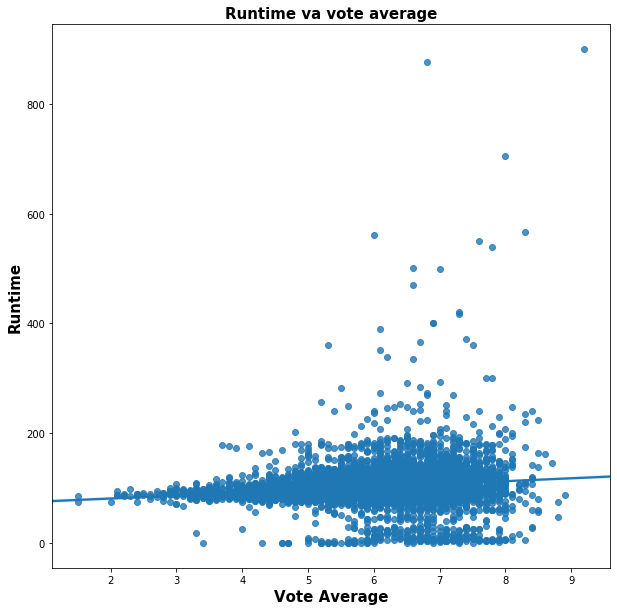

In [62]:
fig = plt.figure(figsize=(10,10))
sns.regplot(x=df.vote_average,y=df.runtime)
plt.xlabel('Vote Average',fontdict={'weight' : 'bold','size'   : 15})
plt.ylabel('Runtime',fontdict={'weight' : 'bold','size'   : 15});
plt.title('Runtime va vote average',fontdict={'weight' : 'bold','size'   : 15});

In [63]:
df_cleaned.groupby('runtime').mean().vote_average.sort_values(ascending=False).head(20)

runtime
900.0    9.20
566.0    8.30
235.0    8.30
220.0    8.30
247.0    8.10
200.0    8.10
705.0    8.00
229.0    7.90
19.0     7.90
540.0    7.80
213.0    7.80
300.0    7.75
31.0     7.70
550.0    7.60
201.0    7.55
216.0    7.50
230.0    7.40
24.0     7.40
372.0    7.40
225.0    7.35
Name: vote_average, dtype: float64

#### conclusion
- the high run time values are preferred

### Research Question 12 (which runtime movies gain more profit?)

In [64]:
#Top 30 runtime profit
Top_30_runtime= pd.DataFrame(df_cleaned.groupby('runtime').mean().profit.sort_values(ascending=False).head(30))
Top_30_runtime

,profit
runtime,
201.0,1.214855e+09
174.0,1.072786e+09
179.0,1.027134e+09
169.0,5.988096e+08
197.0,5.150966e+08
143.0,4.675361e+08
175.0,4.547534e+08
161.0,4.474590e+08
216.0,3.964647e+08


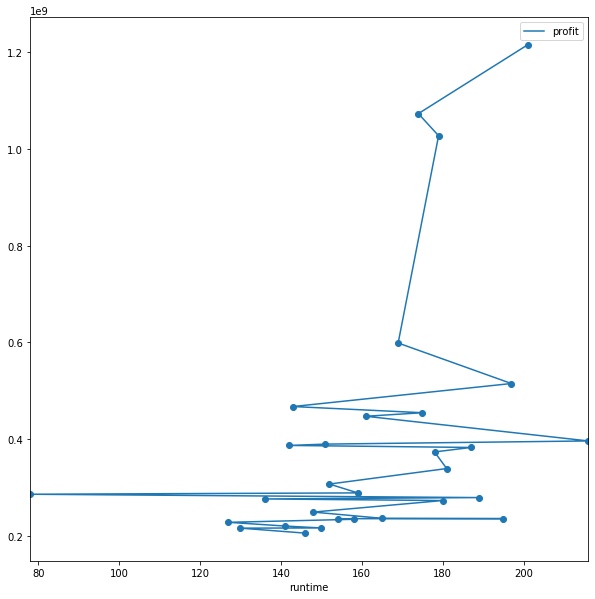

In [65]:
Top_30_runtime.plot(figsize=(10,10)),
plt.scatter(x=list(Top_30_runtime.index),y=list(Top_30_runtime.iloc[:,0]))

In [66]:
#Mean of Top 30 Profit Movies
np.mean(Top_30_runtime.index)

162.06666666666666

#### conclusion
- the runtime around 162 minutes gives high profit

#### Data Describe

In [67]:
df_cleaned.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
count,10865.000000,10834.000000,10865.000000,10865.000000,5.167000e+03,4.849000e+03,3.853000e+03
mean,0.646446,102.363855,217.399632,5.975012,3.690335e+07,1.112072e+08,8.794858e+07
std,1.000231,30.948225,575.644627,0.935138,4.196280e+07,1.967518e+08,1.945992e+08
min,0.000065,2.000000,10.000000,1.500000,1.000000e+00,-2.147484e+09,-2.419176e+09
25%,0.207575,90.000000,17.000000,5.400000,8.102293e+06,1.040893e+07,-1.591256e+06
50%,0.383831,99.000000,38.000000,6.000000,2.273036e+07,4.377160e+07,2.734524e+07
75%,0.713857,112.000000,146.000000,6.600000,5.008384e+07,1.308557e+08,1.070055e+08
max,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,1.907006e+09,1.878643e+09


<a id='conclusions'></a>
## Conclusions

> This is IDMb Movies Data set  cleaned containing
- 10865 rows every row represent a movie and and  16 columns represent the movies information like (imdb_id,	popularity,	original_title,	cast,	director,	keywords,	runtime,	genres,	production_companies,	release_date,	vote_count,	vote_average,	budget_adj,	revenue_adj,	genre, Profit)

> After Exploratory Data Analysis :
>>TimeLine analysis
- The number of movies increases with time from 32 movies in 1960 to 700 in 2014.
- The Profits increases with time from 7.977407e+08 dollar in 1960 to 1.750957e+10 dollar in 2015.
- The Average Vote decrease with time from 6.325 in 1960 to 5.885692 in 2015.
- From 2010 to 2015 Drama, Family, Adventure and Science fiction gain more production.
- And Animation, Forgien, western, and music gain less production with time.
>>> Other EDA.
- The vote increase with:
 - Popularity
 - Vote count
 - Movie budget
- The largest produced genre is Drama with 4760 Movie.
- The least produced genre is Western with 165 Movie.
- Advanture, Action and comdy gain the maximum profit.
- The preferred genre is Documentary with averge vote 6.9.
- The top voted movies reated to
 - Mark Cousins | 9.20
 - Derek Frankowski | 8.80
 - David Mallet | 8.70
 - Curt Morgan | 8.50
 - Saul Swimmer | 8.50
- The directors movies gain more profit
 - Steven Spielberg 1.312603e+10
 - Peter Jackson 5.645492e+09
 - Robert Zemeckis 4.335995e+09
 - Chris Columbus 4.171046e+09
 - Michael Bay 3.958676e+09
- The high run time values are preferred
- And the runtime around 162 minutes gives high profit

> Limitions
- Data given from 1960 to 2015
- There are null values in budget_adj, revenue_adj,	profit and Run time.
- preferred Value calculated as high voting
- Dollar value not the same from 1960 to 2015

> published at
- https://github.com/ahmednawaad/Investigate-IDMb-Movies-Dataset